<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
water = pd.read_csv('Data\water.csv', index_col=0)
water.head(300)

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


**2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?**

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

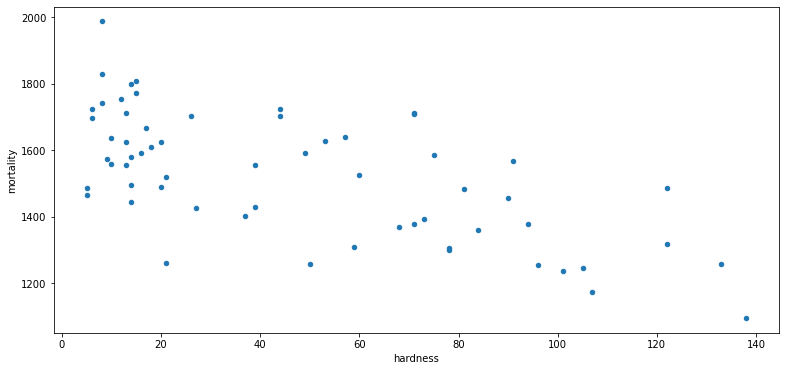

In [4]:
water.plot(kind='scatter', x='hardness', y='mortality')

In [9]:
water[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


В данном конкретном случае можно обойтись и без указания столбцов, просто указав весь Data Frame, поскольку никакие другие столбцы в нем просто не содержат числовые данные

In [7]:
water.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [8]:
water.corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Несмотря на то, что в задании требуется сравнить показатели корреляции Спирмена и Пирсона, при таком разбросе на scatter plot наиболее адекватный показатель корреляции однозначно по Кендаллу

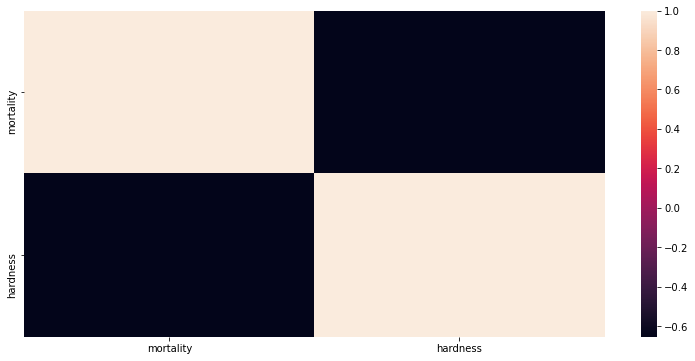

In [10]:
sns.heatmap(water.corr())

**&#8593;&#8593;&#8593;&#8593;&#8593; Самая крутая и информативная тепловая карта, которую только можно представить &#8593;&#8593;&#8593;&#8593;&#8593;**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X=water[['hardness']]
y=water['mortality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=555)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [18]:
model.coef_

array([-2.64717332])

In [19]:
model.intercept_

1661.2947574498949

In [34]:
mort_prediction = model.predict(X_test)
mort_prediction

array([1621.58715768, 1645.41171754, 1407.16611891, 1438.93219873,
       1481.28697182, 1446.87371869, 1454.81523864, 1640.11737091,
       1338.33961265, 1592.46825118, 1648.05889086, 1634.82302427,
       1589.82107786, 1378.04721242, 1423.04915882, 1626.88150431,
       1510.40587832, 1295.98483956, 1473.34545187])

**Находим значение коэффициента детерминации:**

In [33]:
model.score(X_test, y_test) # метод 

0.561021399604235

**Чисто из интереса считаем predict для ВСЕГО исходного DF и прикрепляем его в отельный столбец:**

In [29]:
mort_full_prediction = model.predict(X)

In [35]:
water['Mortality Prediction'] = mort_full_prediction
water.head()

,location,town,mortality,hardness,Mortality Prediction
1,South,Bath,1247,105,1383.341559
2,North,Birkenhead,1668,17,1616.292811
3,South,Birmingham,1466,5,1648.058891
4,North,Blackburn,1800,14,1624.234331
5,North,Blackpool,1609,18,1613.645638


Text(0, 0.5, 'mortality')

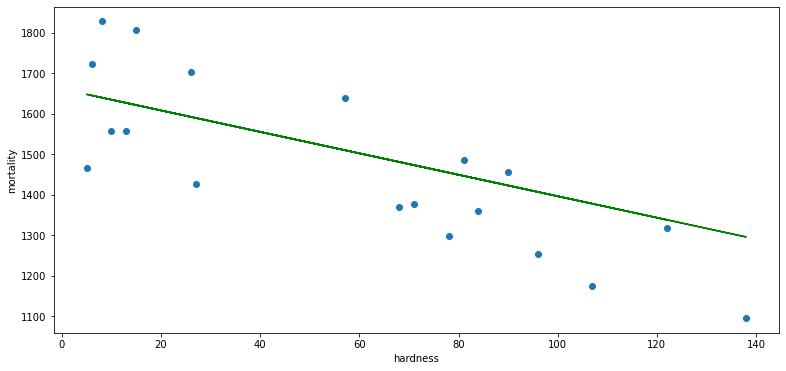

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, mort_prediction, c='g')
plt.xlabel("hardness")
plt.ylabel("mortality")

**Чисто из интереса делаем аналогичный график для ВСЕГО исходного DF:**

Text(0, 0.5, 'mortality')

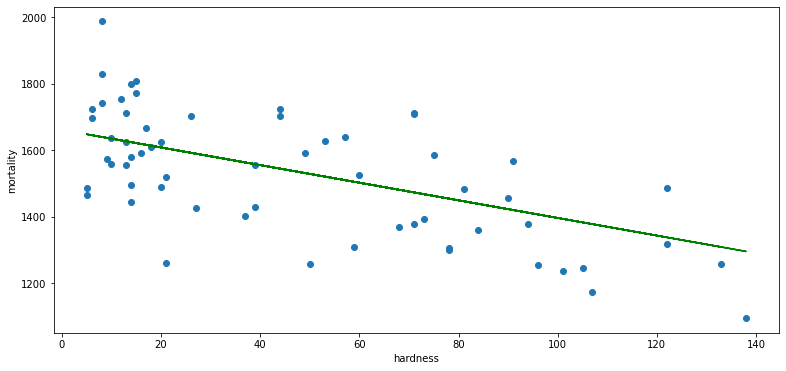

In [44]:
plt.scatter(X, y)
plt.plot(X, mort_full_prediction, c='g')
plt.xlabel("hardness")
plt.ylabel("mortality")

ну, как раз на 56% точности...

**Повторяем опыты с северными и южными городами.**

In [50]:
water_north = water[water['location'] == 'North'].reset_index().drop('index', 1).drop('Mortality Prediction', 1)
water_south = water[water['location'] == 'South'].reset_index().drop('index', 1).drop('Mortality Prediction', 1)
water_north.head()
water_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,South,Birmingham,1466,5
2,South,Bournemouth,1299,78
3,South,Brighton,1359,84
4,South,Bristol,1392,73


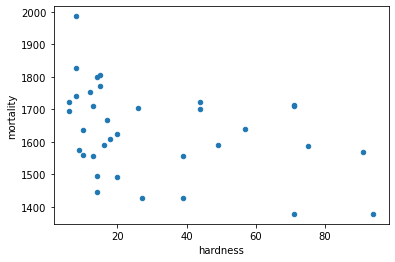

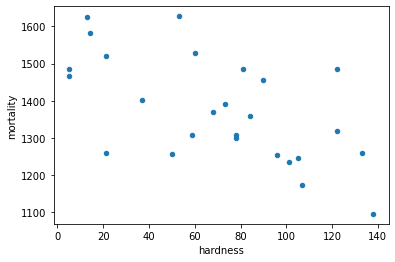

In [26]:
water_north.plot(kind='scatter', x='hardness', y='mortality')
water_south.plot(kind='scatter', x='hardness', y='mortality')


In [131]:
def prediction(data):
    spearman = data.corr(method='spearman')['hardness'][0]*100
    kendall = data.corr(method='kendall')['hardness'][0]*100
    
    X=data[['hardness']]
    y=data['mortality']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=555)
    model = LinearRegression()
    model.fit(X_train, y_train)
    determination = model.score(X_test, y_test)
    mort_prediction = model.predict(X_test)
    
    plt.scatter(X_test, y_test)
    plt.plot(X_test, mort_prediction, c='g')
    plt.xlabel("Жесткость воды (содержание кальция)")
    plt.ylabel("Смертность населения")
    
    return print('Коэффициент Спирмана составляет: ', spearman), print('Коэффициент Кендалла составляет: ', kendall), print('Коэффициент детерминации составляет: ', determination), 
    plt.scatter, plt.plot


Для северных городов:

Коэффициент Спирмана составляет:  -40.42078956511175
Коэффициент Кендалла составляет:  -28.305809772010832
Коэффициент детерминации составляет:  0.026565035833615136
(None, None, None)


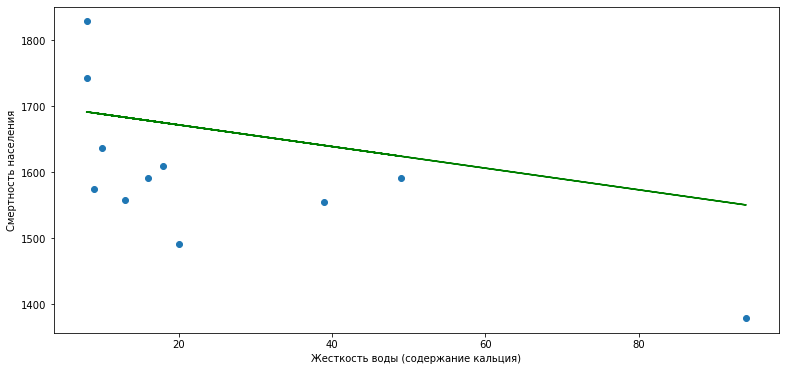

In [132]:
print('Для северных городов:\n')
print(prediction(water_north))

Для южных городов:

Коэффициент Спирмана составляет:  -59.57229185013566
Коэффициент Кендалла составляет:  -44.03148402800253
Коэффициент детерминации составляет:  0.5506930019362616
(None, None, None)


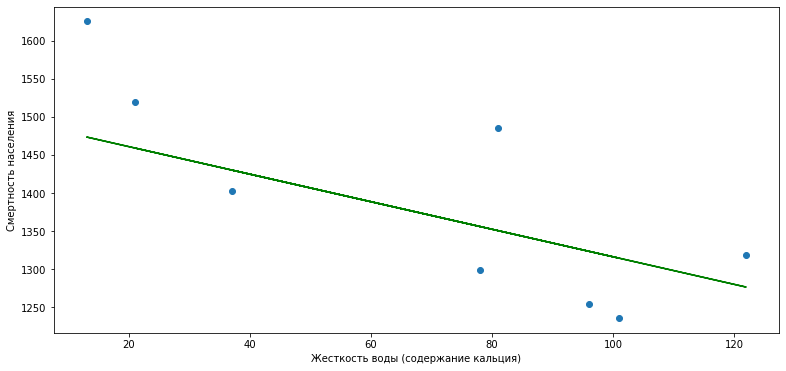

In [133]:
print('Для южных городов:\n')
print(prediction(water_south))

**Выводы**

Если не учитывать крайнюю скудность данных, то можно сказать, что в северных городах зависимость выражена значительно хуже, а качество преддиктивной модели вообще отвратительное.

Для южных городов показатели зависимости очень близки к показателям общей выборки. Это в свою очередь может говоритьо том, что и в коэффициенты для всего общего датасета основной вклад был внесен именно за счет данных по южным городам.